In [1]:
! pip install mlxtend

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data1 = pd.read_csv('book (1).csv',sep=',')
data1

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [4]:
data1.shape

(2000, 11)

In [5]:
data1.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [6]:
data1.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

## 1. for support value = 0.09 and confidence value = 0.1,max value of item sets = 2

In [7]:
from mlxtend.frequent_patterns import apriori,association_rules

In [8]:
fre_item_sets = apriori(df=data1,min_support=0.09,use_colnames=True,max_len=2)
fre_item_sets.head()

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)


In [9]:
rules = association_rules(df = fre_item_sets, metric='confidence',min_threshold=0.1)

In [10]:
rules.shape

(42, 9)

In [11]:
rules.sort_values(by='lift',ascending=False,inplace=True)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
30,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
41,(GeogBks),(ArtBks),0.2760,0.2410,0.1275,0.461957,1.916832,0.060984,1.410667
40,(ArtBks),(GeogBks),0.2410,0.2760,0.1275,0.529046,1.916832,0.060984,1.537304
39,(RefBks),(GeogBks),0.2145,0.2760,0.1105,0.515152,1.866491,0.051298,1.493250


###  OBSERVATION

Total 42 Rules have been ruled out. The top five rules with highest lift values states as follows:

* Cookbooks and ItalCook are most likely to be bought together than  just buying ItalCook alone
* ItalCook and  Cookbooks are most likely to be bought together than  just buying CookBks alone
* ArtBks and GeogBks are most likely to be bougth together than just buying GeogBks alone
* GeogBks and ArtBks are most likely to be bougth together than just buying ArtBks alone
* GeogBks and RefBks are most likely to be bougth together than just buying RefBks alone

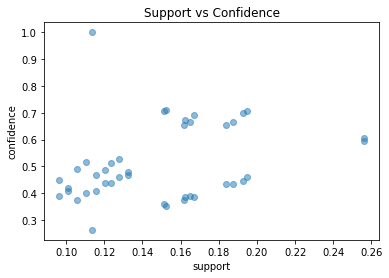

In [24]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

<AxesSubplot:xlabel='support', ylabel='confidence'>

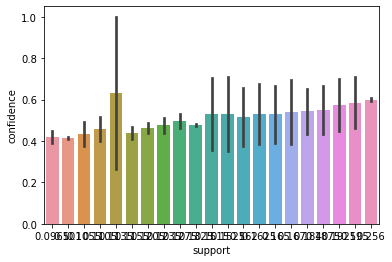

In [25]:
sns.barplot(x='support',y='confidence',data=rules)

## 2. for support value = 0.1 and confidence value = 0.2, max_length = 5 

In [12]:
fre_item_sets1 = apriori(df=data1,min_support=0.1,use_colnames=True,max_len= 5)
fre_item_sets1.head()

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)


In [13]:
rules1 = association_rules(df = fre_item_sets1, metric='confidence',min_threshold=0.2)
rules1 .sort_values(by='lift',ascending=False,inplace=True)
rules1.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
77,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
80,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
85,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674


In [14]:
rules1.shape

(100, 9)

## OBSERVATION

* Total 100 Rules have been ruled out. The top five rules with highest lift values states as follows:

   * Cookbooks and ItalCook are most likely to be bought together than just buying ItalCook alone
   * ItalCook and Cookbooks are most likely to be bought together than just buying CookBks alone
   * (ChildBks, ArtBks) and GeogBks are most likely to be bougth together than just buying GeogBks alone
   * GeogBks and (ChildBks, ArtBks)	are most likely to be bougth together than just buying (ChildBks, ArtBks) alone
   * ArtBks and (DoItYBks, CookBks) are most likely to be bougth together than just buying (DoItYBks, CookBks) alone

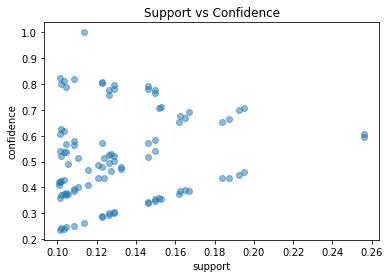

In [26]:
plt.scatter(rules1['support'], rules1['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

<AxesSubplot:xlabel='support', ylabel='confidence'>

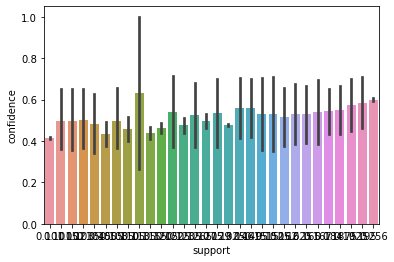

In [27]:
sns.barplot(x='support',y='confidence',data=rules1)

## 3. for support value = 0.05 and confidence value = 0.5,max length of itemset = 3

In [15]:
fre_item_sets2 = apriori(df=data1,min_support=0.05,use_colnames=True,max_len= 3)
fre_item_sets2.head()

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)


In [16]:
rules2 = association_rules(df = fre_item_sets2, metric='confidence',min_threshold=0.5)
rules2.sort_values(by='lift',ascending=False,inplace=True)
rules2.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
80,(ItalCook),"(YouthBks, CookBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193
114,(ItalCook),"(GeogBks, CookBks)",0.1135,0.1925,0.0640,0.563877,2.929229,0.042151,1.851540
50,(ItalCook),"(CookBks, ChildBks)",0.1135,0.2560,0.0850,0.748899,2.925385,0.055944,2.962947
104,(ItalCook),"(DoItYBks, CookBks)",0.1135,0.1875,0.0585,0.515419,2.748899,0.037219,1.676705
28,"(YouthBks, ChildBks)",(RefBks),0.1650,0.2145,0.0830,0.503030,2.345130,0.047608,1.580579


In [17]:
rules2.shape

(124, 9)

### OBSERVATION

* Total 124 Rules have been ruled out. The top five rules with highest lift values states as follows:

   * ItalCook and (CookBks, YouthBks) are most likely to be bought together than just buying (CookBks, YouthBks) alone
   * ItalCook and (CookBks, GeogBks) are most likely to be bought together than just buying (CookBks, GeogBks) alone
   * ItalCook and (ChildBks, CookBks) are most likely to be bougth together than just buying (ChildBks, CookBks) alone
   * ItalCook and (DoItYBks, CookBks) are most likely to be bougth together than just buying (DoItYBks, CookBks) alone
   * (ChildBks, YouthBks) and RefBks are most likely to be bougth together than just buying RefBks alone

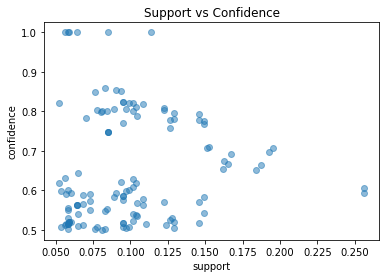

In [28]:
plt.scatter(rules2['support'], rules2['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

<AxesSubplot:xlabel='support', ylabel='confidence'>

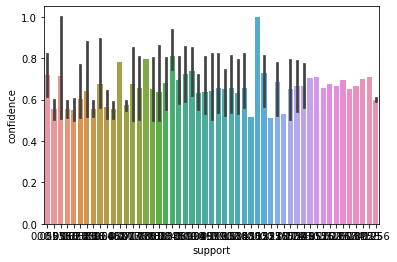

In [29]:
sns.barplot(x='support',y='confidence',data=rules2)

## 4. for support value = 0.02 and confidence value = 0.7,max length of itemset = 10

In [18]:
fre_item_sets3 = apriori(df=data1,min_support=0.02,use_colnames=True,max_len= 10)
fre_item_sets3.head()

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)


In [19]:
rules3 = association_rules(df = fre_item_sets3, metric='confidence',min_threshold=0.7)
rules3.sort_values(by='lift',ascending=False,inplace=True)
rules3.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
335,"(ItalAtlas, CookBks, ChildBks)","(ItalCook, RefBks)",0.0225,0.0465,0.0200,0.888889,19.115890,0.018954,8.581500
238,"(ItalAtlas, CookBks)","(ItalCook, RefBks)",0.0285,0.0465,0.0230,0.807018,17.355216,0.021675,4.940864
374,"(GeogBks, ItalArt, CookBks)","(ItalCook, ArtBks)",0.0250,0.0565,0.0240,0.960000,16.991150,0.022587,23.587500
337,"(ItalAtlas, CookBks)","(ItalCook, RefBks, ChildBks)",0.0285,0.0415,0.0200,0.701754,16.909744,0.018817,3.213794
350,"(ItalArt, CookBks, ChildBks)","(ItalCook, ArtBks)",0.0300,0.0565,0.0285,0.950000,16.814159,0.026805,18.870000


In [20]:
rules3.shape

(391, 9)

### OBSERVATION

* Total 391 Rules have been ruled out. The top five rules with highest lift values states as follows:

   * (ItalAtlas, ChildBks, CookBks) and (RefBks, ItalCook) are most likely to be bought together than just buying (RefBks,            ItalCook) alone
   * (ItalAtlas, CookBks) and (RefBks, ItalCook) are most likely to be bought together than just buying (RefBks, ItalCook)            alone
   * (CookBks, GeogBks, ItalArt) and (ItalCook, ArtBks) are most likely to be bougth together than just buying (ItalCook,             ArtBks) alone
   * (CookBks, ItalAtlas) and (ChildBks, RefBks, ItalCook) are most likely to be bougth together than just buying (ChildBks,           RefBks, ItalCook)  alone
   * (CookBks, ChildBks, ItalArt) and (ItalCook, ArtBks) are most likely to be bougth together than just buying (ItalCook,             ArtBks) alone

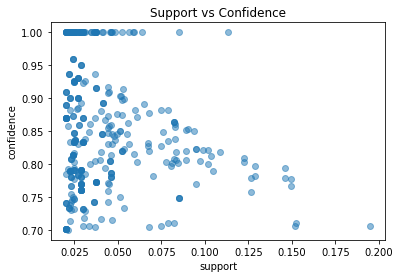

In [30]:
plt.scatter(rules3['support'], rules3['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

<AxesSubplot:xlabel='support', ylabel='confidence'>

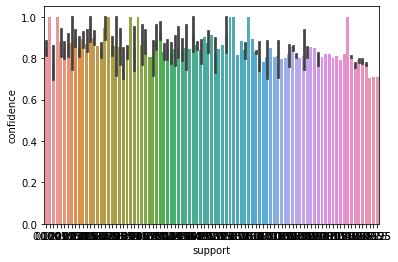

In [31]:
sns.barplot(x='support',y='confidence',data=rules3)

## 5. for support value = 0.01 and confidence value = 0.6,max length of itemset = 4

In [21]:
fre_item_sets4 = apriori(df=data1,min_support=0.01,use_colnames=True,max_len= 4)
fre_item_sets4.head()

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)


In [22]:
rules4 = association_rules(df = fre_item_sets4, metric='confidence',min_threshold=0.6)
rules4.sort_values(by='lift',ascending=False,inplace=True)
rules4.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
713,"(ItalArt, RefBks)","(ItalAtlas, ArtBks)",0.0200,0.0180,0.0165,0.825000,45.833333,0.01614,5.611429
711,"(ItalAtlas, ArtBks)","(ItalArt, RefBks)",0.0180,0.0200,0.0165,0.916667,45.833333,0.01614,11.760000
729,"(ItalArt, RefBks)","(ItalAtlas, ItalCook)",0.0200,0.0230,0.0125,0.625000,27.173913,0.01204,2.605333
430,"(ItalArt, RefBks)","(ItalAtlas, ChildBks)",0.0200,0.0285,0.0145,0.725000,25.438596,0.01393,3.532727
723,"(ItalArt, GeogBks, RefBks)",(ItalAtlas),0.0135,0.0370,0.0115,0.851852,23.023023,0.01100,6.500250


In [23]:
rules4.shape

(748, 9)

### OBSERVATION

* Total 748 Rules have been ruled out. The top five rules with highest lift values states as follows:

     * (RefBks, ItalArt) and (ItalAtlas, ArtBks) are most likely to be bought together than just buying (ItalAtlas, ArtBks)	             alone
     * (ItalAtlas, ArtBks) and (RefBks, ItalArt)	are most likely to be bought together than just buying (RefBks, ItalArt)	         alone
     * (RefBks, ItalArt)) and (ItalAtlas, ItalCook) are most likely to be bougth together than just buying (ItalAtlas, ItalCook)	    alone
     * (RefBks, ItalArt) and (ChildBks, ItalAtlas) are most likely to be bougth together than just buying (ChildBks, ItalAtlas)	        alone
     * (GeogBks, RefBks, ItalArt) and (ItalAtlas) are most likely to be bougth together than just buying (ItalAtlas) alone

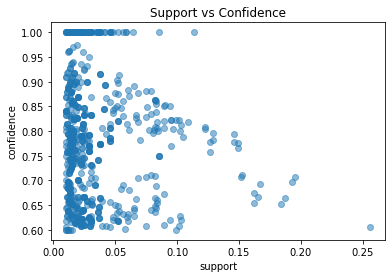

In [32]:
plt.scatter(rules4['support'], rules4['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

<AxesSubplot:xlabel='support', ylabel='confidence'>

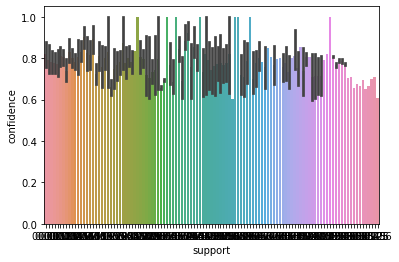

In [33]:
sns.barplot(x='support',y='confidence',data=rules4)